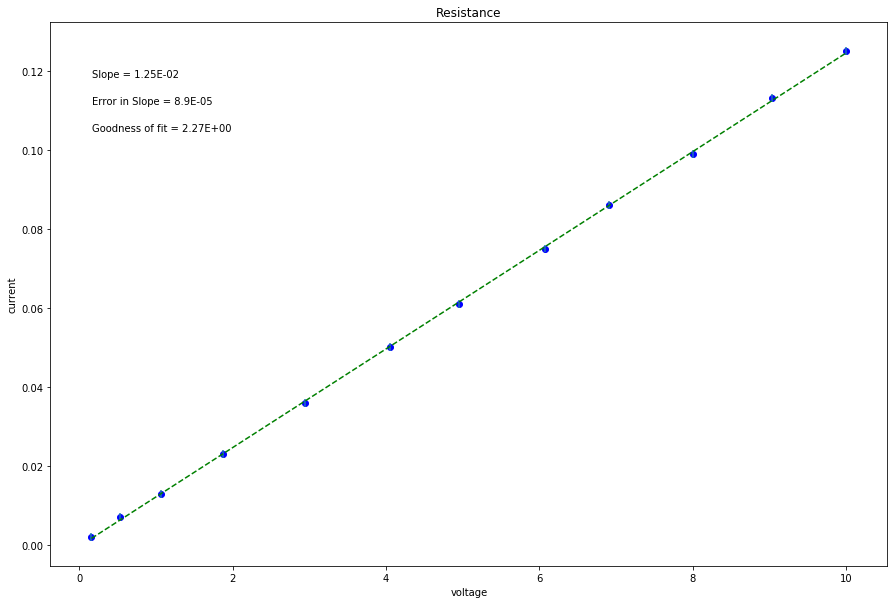

In [3]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from autoErr import autoErr

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations

def arr_with_err(err, ls):
    return np.array(list(map(lambda v: autoErr(v, err),ls)))

voltages = arr_with_err(0.03, [0.162,0.53,1.07, 1.88,2.95,4.05,4.95,6.07,6.9,8,9.03,10]) #Volts
currents = arr_with_err(0.001, [0.002,0.007,0.013,0.023,0.036,0.05,0.061,0.075,0.086,0.099,0.113,0.125]) #Amps
resistance = autoErr(82.2, 0.1);

#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_currents = np.vectorize(lambda e: e.err)(currents)


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = np.vectorize(float)(voltages)   #this should be the array you want to plot on the x axis
y = np.vectorize(float)(currents)
dy = err_currents  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('voltage')
plt.ylabel('current')
plt.title('Resistance')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


In [10]:
1/autoErr(0.0125, 8.9e-5)

autoErr(80.0, 0.5695999999999999)

In [31]:
SI1 = autoErr(0.041, 0.001)
SI2 = autoErr(0.041,0.001)
SIT = SI1
SV1 = autoErr(4, 0.03)
SV2 = autoErr(0.974, 0.03)
SVT = autoErr(4.98,0.03)
SR1 = SV1/SI1
SR2 = SV2/SI2
SRT = SR1 + SR2

PI1 = autoErr(0.051,0.001)
PI2 = autoErr(0.212,0.001)
PIT = PI1 + PI2
PV1 = autoErr(4.94,0.03)
PV2 = autoErr(4.97,0.03)
PVT = autoErr(5.03, 0.03)
PR1 = PV1/PI1
PR2 = PV2/PI2

R1 = autoErr(98.5, 0.1)
R2 = autoErr(24.1, 0.1)

In [32]:
SR1, SR2

(autoErr(97.5609756097561, 2.4894953560625264),
 autoErr(23.756097560975608, 0.9333379203712711))

In [33]:
PR1, PR2

(autoErr(96.86274509803923, 1.9882770026881513),
 autoErr(23.443396226415093, 0.17959206936622485))

In [38]:
SVT / SIT, SRT

(autoErr(121.46341463414635, 3.0515461694269503),
 autoErr(121.3170731707317, 2.6587039702569095))

In [37]:
PVT / PIT, 1/(1/PR1 + 1/PR2)

(autoErr(19.125475285171103, 0.1535842881077918),
 autoErr(18.87511051316548, 0.13875730684493606))